<a href="https://colab.research.google.com/github/fariaswladimir/dry_beans_ML/blob/main/drybeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dry Bean Dataset
Análise do dataset de características de 7 tipos de feijão seco

Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Fonte:https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Iniciando a importação de bibliotecas:

* Numpy
* Pandas
* Seaborn
* Matplotlib
* Pylab
* Graphviz 
* Sklearn
* yellowbrick

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import graphviz

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from matplotlib.ticker import PercentFormatter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


from sklearn.utils import resample

In [ ]:
# Realizar upload do dataset que esta no formato para o Excel
df = pd.read_excel('Dry_Bean_Dataset.xlsx')


In [ ]:
#mostrar os primeiros 5 registros do dataframe
df.head() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY


In [ ]:
# Contar e demonstrar quantas linhas (13611) e colunas (17)/ também chamado de atributos ou dimensões/ 
df.shape

(13611, 17)

In [ ]:
#contando a quantidade de registros iguais
df.value_counts()

Area    Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent    Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class   
42156   815.245    335.198243       160.936938       2.082792      0.877200      42586       231.677980     0.834046  0.989903  0.797064   0.691167     0.007951      0.001119      0.477712      0.994975      HOROZ       2
54187   919.972    372.954622       186.450123       2.000292      0.866067      54828       262.665246     0.759241  0.988309  0.804555   0.704282     0.006883      0.001045      0.496013      0.992171      HOROZ       2
49730   879.912    365.825690       173.569194       2.107665      0.880278      50263       251.631084     0.789365  0.989396  0.807142   0.687844     0.007356      0.001016      0.473130      0.997199      HOROZ       2
53978   924.848    366.147740       189.438667       1.932804      0.855754      54949       262.158204     0.627272 

In [ ]:
df_duplicates = df.drop_duplicates()
df_duplicates

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,BOMBAY
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,BOMBAY
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,BOMBAY
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,BOMBAY
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,20942,530.683,191.176525,139.586402,1.369593,0.683293,21191,163.291710,0.742361,0.988250,0.934453,0.854141,0.009129,0.002997,0.729557,0.999196,DERMASON
13607,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049,DERMASON
13608,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414,DERMASON
13609,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045,DERMASON


In [ ]:
df_duplicates.shape

(13543, 17)

In [ ]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
#função para 
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


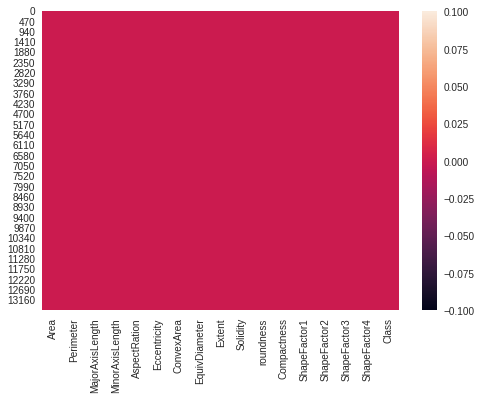

In [ ]:
sns.heatmap(df.isna())

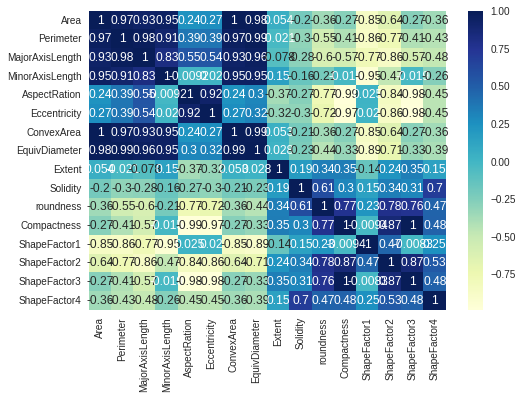

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
Classes = df.Class.unique()
Classes

array(['BOMBAY', 'BARBUNYA', 'CALI', 'HOROZ', 'SIRA', 'SEKER', 'DERMASON'],
      dtype=object)

Text(0, 0.5, 'Quantidade')

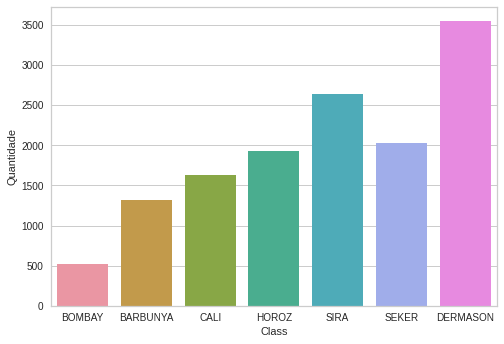

In [ ]:
cp_df =  df.replace({"Class": {1: 'SEKER', 2: 'BARBUNYA', 3: 'BOMBAY', 4: 'CALI', 5: 'HOROZ', 6: 'SIRA', 7: 'DERMASON'}})
cp = sns.countplot(x='Class', 
                   orient='H',
                   data=cp_df)
cp.set_xlabel("Class")
cp.set_ylabel("Quantidade")

In [ ]:
Group = df.groupby(['Class']).size()
Group

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

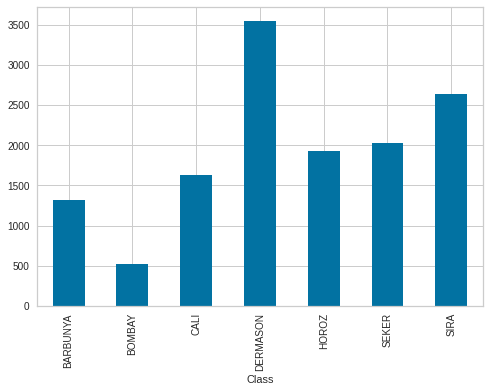

In [ ]:
Group.plot.bar()

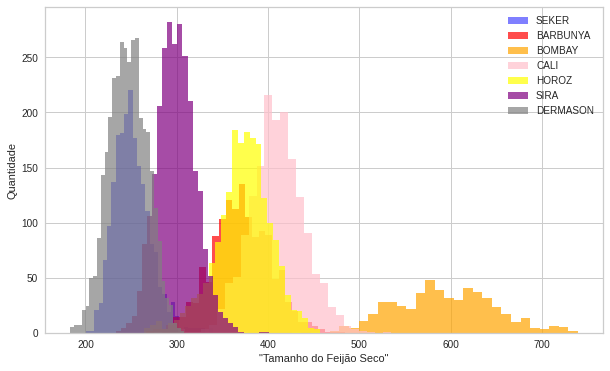

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'SEKER']['MajorAxisLength'].hist(alpha=0.5, color= 'blue', bins= 30, label='SEKER')
df[df['Class'] == 'BARBUNYA']['MajorAxisLength'].hist(alpha=0.7, color= 'red', bins= 30, label='BARBUNYA')
df[df['Class'] == 'BOMBAY']['MajorAxisLength'].hist(alpha=0.7, color= 'orange', bins= 30, label='BOMBAY')
df[df['Class'] == 'CALI']['MajorAxisLength'].hist(alpha=0.7, color= 'pink', bins= 30, label='CALI')
df[df['Class'] == 'HOROZ']['MajorAxisLength'].hist(alpha=0.7, color= 'yellow', bins= 30, label='HOROZ')
df[df['Class'] == 'SIRA']['MajorAxisLength'].hist(alpha=0.7, color= 'purple', bins= 30, label='SIRA')
df[df['Class'] == 'DERMASON']['MajorAxisLength'].hist(alpha=0.7, color= 'gray', bins= 30, label='DERMASON')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

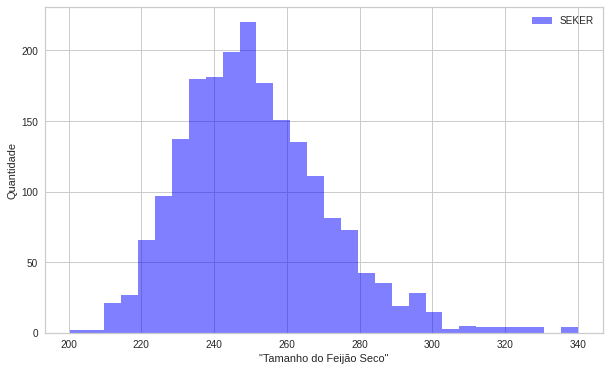

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'SEKER']['MajorAxisLength'].hist(alpha=0.5, color= 'blue', bins= 30, label='SEKER')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

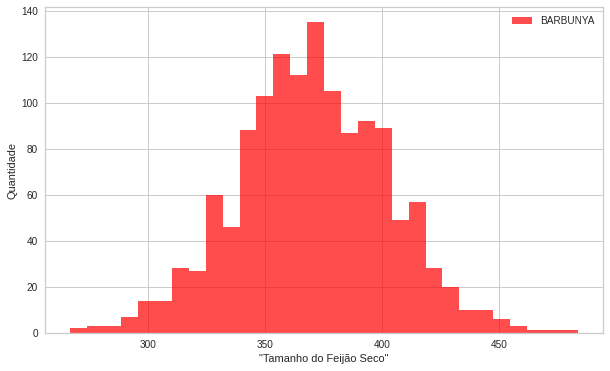

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'BARBUNYA']['MajorAxisLength'].hist(alpha=0.7, color= 'red', bins= 30, label='BARBUNYA')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

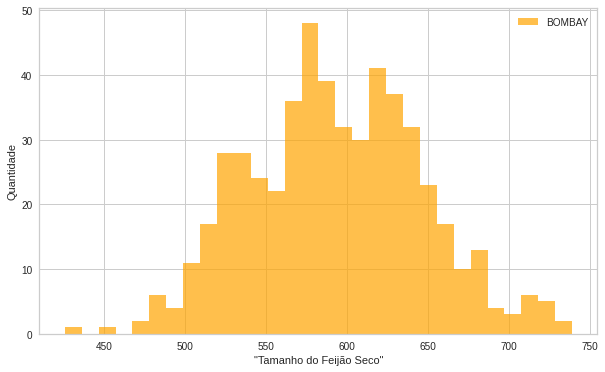

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'BOMBAY']['MajorAxisLength'].hist(alpha=0.7, color= 'orange', bins= 30, label='BOMBAY')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

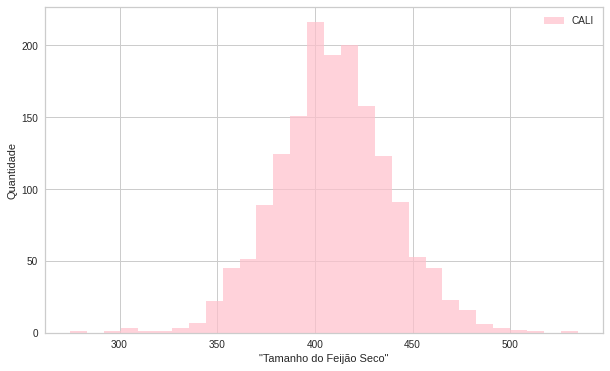

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'CALI']['MajorAxisLength'].hist(alpha=0.7, color= 'pink', bins= 30, label='CALI')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

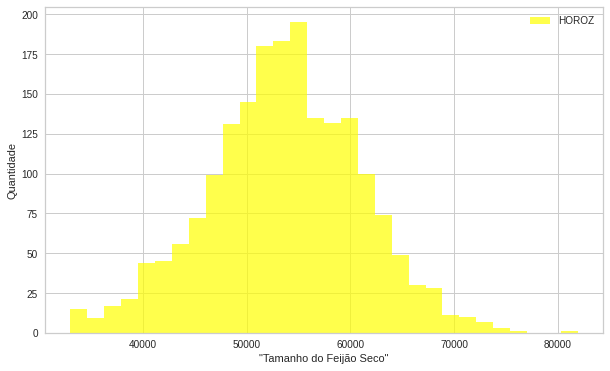

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'HOROZ']['MajorAxisLength'].hist(alpha=0.7, color= 'yellow', bins= 30, label='HOROZ')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

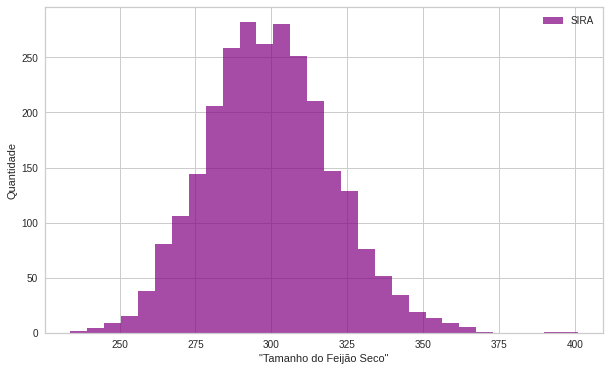

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'SIRA']['MajorAxisLength'].hist(alpha=0.7, color= 'purple', bins= 30, label='SIRA')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

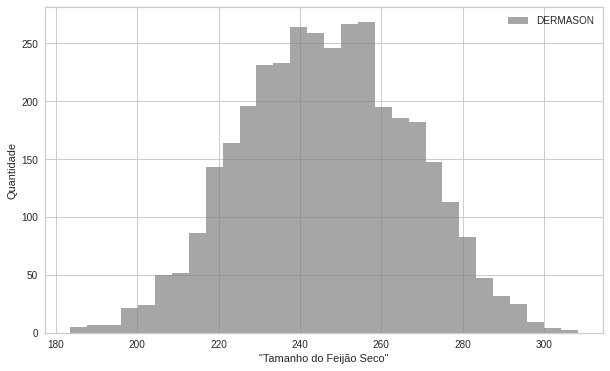

In [ ]:
plt.figure(figsize=(10,6))
df[df['Class'] == 'DERMASON']['MajorAxisLength'].hist(alpha=0.7, color= 'gray', bins= 30, label='DERMASON')
plt.legend()
plt.xlabel('"Tamanho do Feijão Seco"')
plt.ylabel('Quantidade')
plt.show()

Qual é a variável que mais impactam os dados?

In [ ]:
cleanup_nums = {"Class": {'SEKER': 1, 'BARBUNYA': 2, 'BOMBAY': 3, 'CALI': 4, 'DERMASON': 5, 'HOROZ': 6, 'SIRA': 7}}

In [ ]:
df_replaced = df.replace(cleanup_nums)
df_replaced.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,0.002902,0.000631,0.593843,0.980663,3
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160,3
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235,3
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790,3
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718,3


In [ ]:
df3 = df_replaced.drop(columns=['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'])
#df2 = df.drop(columns=['Class'])
df3.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612,3
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,3
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,3
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,3
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,3


In [ ]:
df2 = df.drop(columns=['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class'])
#df2 = df.drop(columns=['Class'])
df2.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness
0,254616,1985.370,738.860153,447.418329,1.651386,0.795806,263261,569.374358,0.783747,0.967162,0.811732,0.770612
1,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621
2,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793
3,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121
4,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527


In [ ]:
x = df2.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df2.columns)
#(x_scaled, columns=df2.columns)

In [ ]:
x = df3.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df3.columns)
#(x_scaled, columns=df2.columns)

In [ ]:
df_normalized.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,1.000000,1.000000,1.000000,0.962154,0.445781,0.833037,1.000000,1.000000,0.734794,0.635223,0.642855,0.375037,0.333333
1,0.925934,0.956399,0.998711,0.859998,0.542710,0.880821,0.906875,0.951641,0.735976,0.883221,0.634208,0.300075,0.333333
2,0.986405,0.955155,0.964459,0.972542,0.405501,0.808740,0.975942,0.991250,0.680203,0.761928,0.733619,0.421705,0.333333
3,0.943236,0.938773,0.977512,0.902784,0.480112,0.851510,0.921913,0.963092,0.854055,0.907939,0.706537,0.353433,0.333333
4,0.973561,0.930980,0.957124,0.958083,0.411426,0.812510,0.949793,0.982932,0.811315,0.930219,0.777089,0.420938,0.333333


In [ ]:
X = df.drop(columns='Class')
y = df['Class']

In [ ]:
w = df_normalized.drop(columns='Class')
z = df_normalized['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size=0.7)

In [ ]:
# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(X_train, y_train)

In [ ]:
# Criando modelo com menos características e normalizada
dtc2 = DecisionTreeClassifier(criterion='entropy')
dtc2 = dtc2.fit(w_train, z_train)

ValueError: ignored

In [ ]:
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)
print(classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.88      0.88       918
      BOMBAY       1.00      0.99      1.00       361
        CALI       0.92      0.89      0.90      1136
    DERMASON       0.89      0.89      0.89      2463
       HOROZ       0.93      0.94      0.93      1365
       SEKER       0.92      0.93      0.92      1428
        SIRA       0.81      0.82      0.81      1857

    accuracy                           0.89      9528
   macro avg       0.91      0.91      0.91      9528
weighted avg       0.89      0.89      0.89      9528



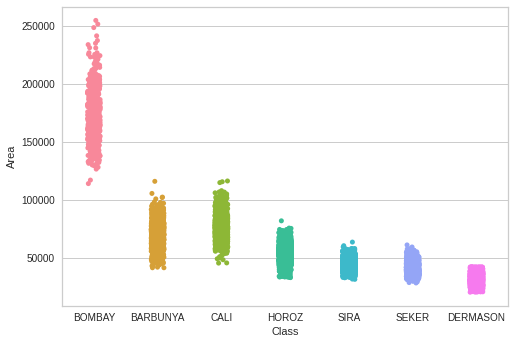

In [ ]:
sns.stripplot (x='Class',y='Area',data=df)

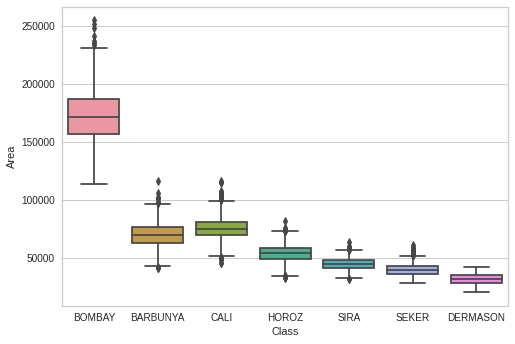

In [ ]:
sns.boxplot(x='Class', y='Area', data=df)

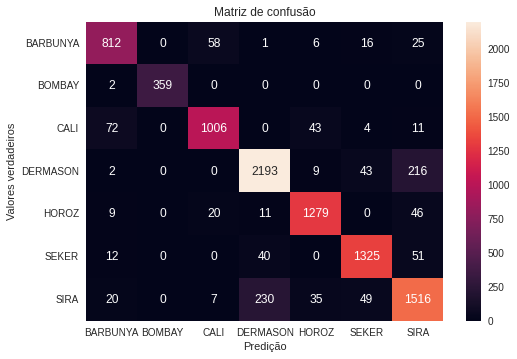

In [ ]:
ax= pl.subplot()
labels = ['Classes']
confusion_matrix = pd.crosstab(y_test, resultado_dtc, rownames=['Valores verdadeiros'], colnames=['Predição'])

# Customização
ax.set_title('Matriz de confusão');
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

sns.heatmap(confusion_matrix, annot=True, fmt="d")

Rates: 
* True Positive Rate(TPR): True Positive/positive
* False Positive Rate(FPR): False Positive /Negative
* False Negative Rate(FNR): False Negative/Positive
* True Negative Rate(TNR): True Negative/Negative

In [ ]:
y_pred_proba_tree = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test["CALI"], dtc[:,1] , pos_label=1)
auc = np.trapz(tpr,fpr)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=1)

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


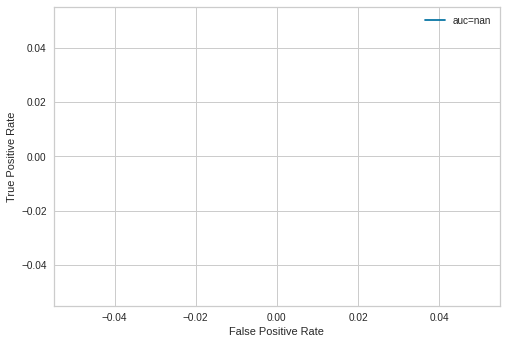

In [ ]:
y_pred_proba_tree = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tree, pos_label=0.5)
auc = np.trapz(tpr,fpra)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=1)

###**GRÁFICO DE PARETO DE AREA - "TAMANHO" DO FEIJÃO SECO**

In [ ]:
def countInterval(valorInicial, valorFinal):
  new_df = df.drop(columns='Class')
  dfIntervalo = new_df[new_df['MajorAxisLength'] >= valorInicial]
  intervalo = len(dfIntervalo[new_df['MajorAxisLength'] <= valorFinal])
  return intervalo

In [ ]:
def createDict(interval, dict_p):

  for i in range(len(interval)):
    res = countInterval(interval[i][0], interval[i][1])
    dict_p['frq_absoluta'].append(res)
dict_p = {'frq_absoluta': []}
createDict([[627.84, 738.9], [516.78, 627.84], [405.72, 516.78], [294.66,405.72], [183.6, 294.66]], dict_p)
print(dict_p)

{'frq_absoluta': [140, 348, 1339, 5121, 6663]}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
df3 = pd.DataFrame(dict_p)
df3.index = ['627.84 - 738.9', '516.78 - 627.84', '405.72 - 516.78', '294.66 - 405.72', '183.6 - 294.66']
df3

,frq_absoluta
627.84 - 738.9,140
516.78 - 627.84,348
405.72 - 516.78,1339
294.66 - 405.72,5121
183.6 - 294.66,6663


In [ ]:
# Classifique pelos valores ao longo de cada eixo.
df3 = df3.sort_values(by='frq_absoluta', ascending=False)
df3

,frq_absoluta
183.6 - 294.66,6663
294.66 - 405.72,5121
405.72 - 516.78,1339
516.78 - 627.84,348
627.84 - 738.9,140


In [ ]:
# cumsum(axis=None, skipna=True, *args, **kwargs) Return cumulative sum over a DataFrame or Series axis.
df3['frq_acumulada'] = df3['frq_absoluta'].cumsum()/df3['frq_absoluta'].sum()*100
df3

,frq_absoluta,frq_acumulada
183.6 - 294.66,6663,48.953053
294.66 - 405.72,5121,86.577033
405.72 - 516.78,1339,96.414665
516.78 - 627.84,348,98.971420
627.84 - 738.9,140,100.000000


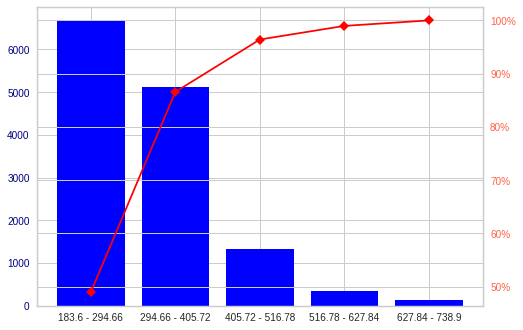

In [ ]:
# Gráfico de Pareto
fig, ax = plt.subplots()
ax.bar(df3.index, df3["frq_absoluta"], color="blue")

#Crie eixos gêmeos compartilhando o eixo x.
ax2 = ax.twinx()

#Marker: D ou o
ax2.plot(df3.index, df3["frq_acumulada"], color="red", marker="D", ms=7)

#Defina o formatador do ticker principal. (O de porcentagem)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="navy")
ax2.tick_params(axis="y", colors="tomato")

plt.show()

# **POLÍGONO DE FREQUÊNCIA - "TAMANHO" DO FEIJÃO SECO**

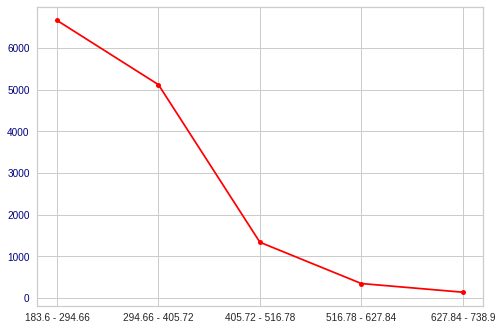

In [ ]:
#Polígono de frequência
fig, ax = plt.subplots()
ax.plot(df3.index, df3["frq_absoluta"], color="red", marker="o", ms=5)

ax.tick_params(axis="y", colors="navy")

plt.show()


# Clusterização e K-means

In [ ]:
kmeans7 = KMeans(n_clusters=7)
y_kmeans7 = kmeans7.fit_predict(x)

kmeans7.cluster_centers_

array([[1.95500465e+05, 1.69323707e+03, 6.39643548e+02, 3.92683714e+02,
        1.63246123e+00, 7.86177120e-01, 1.98292327e+05, 4.98532334e+02,
        7.79176028e-01, 9.85991178e-01, 8.56212166e-01, 7.80448310e-01,
        3.28119329e-03, 7.53097414e-04, 6.09876971e-01, 9.90699577e-01],
       [5.17038415e+04, 8.82080714e+02, 3.42868872e+02, 1.94145855e+02,
        1.78419830e+00, 8.09695781e-01, 5.24085493e+04, 2.56408822e+02,
        7.28076980e-01, 9.86645553e-01, 8.37493227e-01, 7.53329682e-01,
        6.63564223e-03, 1.34127270e-03, 5.71209275e-01, 9.93867850e-01],
       [6.73512000e+04, 1.01854300e+03, 3.84456972e+02, 2.25291985e+02,
        1.72135194e+00, 8.02164823e-01, 6.84331822e+04, 2.92677866e+02,
        7.43780633e-01, 9.84223062e-01, 8.16514895e-01, 7.63885164e-01,
        5.72686187e-03, 1.20998615e-03, 5.85810902e-01, 9.92777987e-01],
       [3.07269212e+04, 6.49479363e+02, 2.37836576e+02, 1.64829068e+02,
        1.45100738e+00, 7.10825487e-01, 3.10923077e+04, 1.974

Text(0, 0.5, 'lllll')

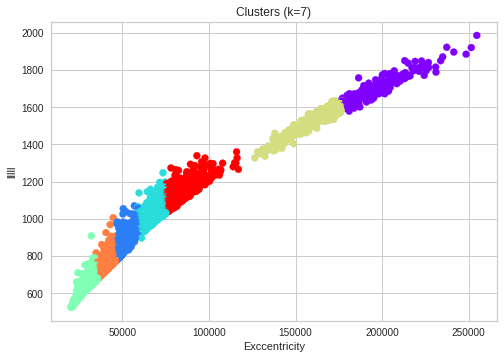

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans7, cmap='rainbow')
plt.title('Clusters (k=7)')
plt.xlabel('Exccentricity')
plt.ylabel('Area')

In [ ]:
silhouette_score(x, labels=kmeans7.labels_, metric='euclidean')

0.5323770604057795

In [ ]:
silhouette_score(x, labels=kmeans7.labels_, metric='euclidean')

0.5323770604057795

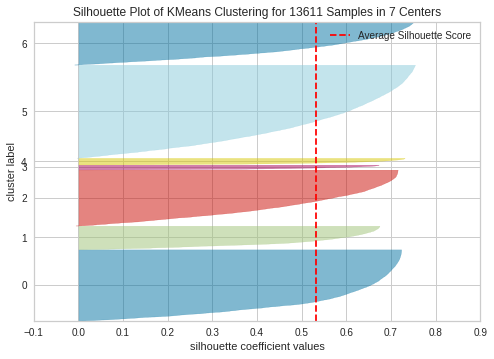

In [ ]:
for i in [7]: #[1, 2, 3, 4, 5, 6, 7]:
    #'''
    #Cria uma instância KMeans para um número diferente de clusters
    #'''
    km = KMeans(n_clusters=7)
    model = SilhouetteVisualizer(km, colors='yellowbrick',)
    model.fit(x)
    model.show()

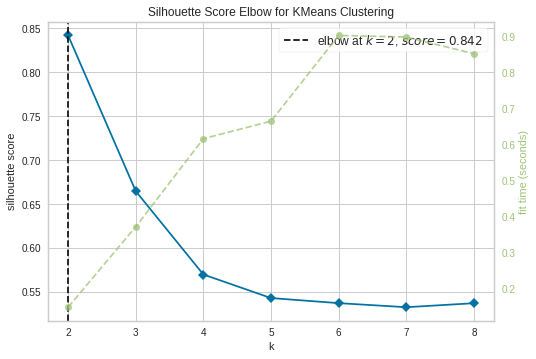

In [ ]:
#Visualiza o Elbow para achar o k ideal
#silhouette calinski_harabasz
visualizer = KElbowVisualizer(KMeans(), k=(2,9), timings=True, metric='silhouette')

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Árvore de decisão

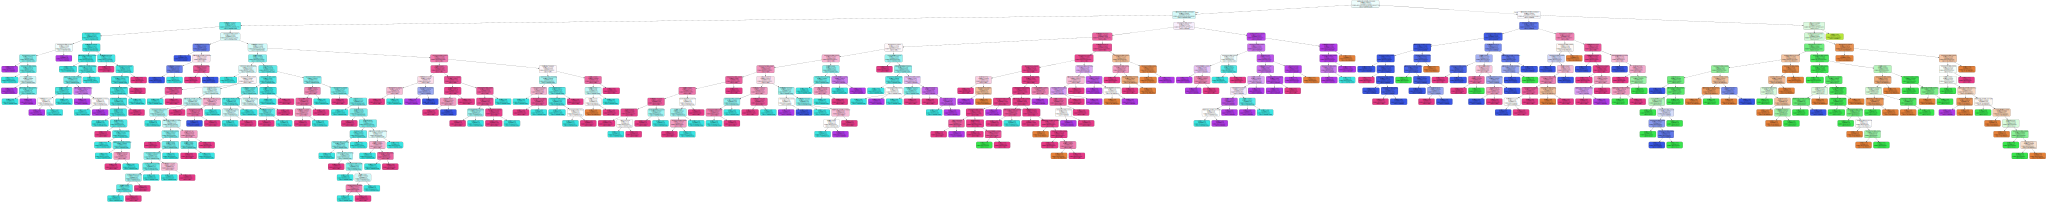

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                    feature_names=X.columns,  
                     class_names=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA',],  
                     filled=True, rounded=True,  
                     special_characters=True,
                      #max_depth=2
                     )  
graph = graphviz.Source(dot_data)  
graph